In [11]:
!pip install yt-dlp opencv-python-headless

ERROR: Signature extraction failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/youtube_dl/extractor/youtube.py", line 1360, in _decrypt_signature
    func = self._extract_signature_function(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/youtube_dl/extractor/youtube.py", line 1274, in _extract_signature_function
    res = self._parse_sig_js(code)
          ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/youtube_dl/extractor/youtube.py", line 1343, in _parse_sig_js
    initial_function = jsi.extract_function(funcname)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/youtube_dl/jsinterp.py", line 245, in extract_function
    raise ExtractorError('Could not find JS function %r' % funcname)
youtube_dl.utils.ExtractorError: Could not find JS function 'decodeURIComponent'; please report this issue on https://yt-dl.org/bug . Make s

Pafy failed: ERROR: Signature extraction failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/youtube_dl/extractor/youtube.py", line 1360, in _decrypt_signature
    func = self._extract_signature_function(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/youtube_dl/extractor/youtube.py", line 1274, in _extract_signature_function
    res = self._parse_sig_js(code)
          ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/youtube_dl/extractor/youtube.py", line 1343, in _parse_sig_js
    initial_function = jsi.extract_function(funcname)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/youtube_dl/jsinterp.py", line 245, in extract_function
    raise ExtractorError('Could not find JS function %r' % funcname)
youtube_dl.utils.ExtractorError: Could not find JS function 'decodeURIComponent'; please report this issue on https://yt-dl.org

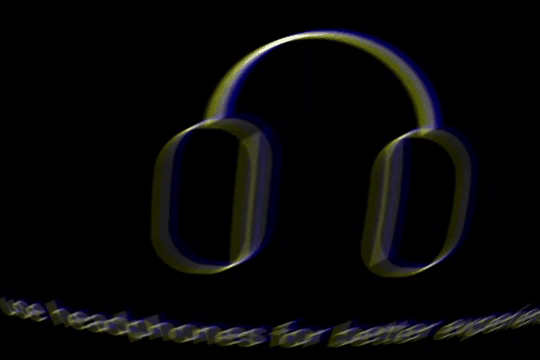

In [14]:

import cv2
import pafy
import yt_dlp
from IPython.display import display, Image
import io
import PIL.Image

# YouTube video URL
url = 'https://youtu.be/kBYt_Fc4dV8?si=SLF1GYyy-YmnMPUC'

# Fetch the best MP4 stream
try:
    video = pafy.new(url)
    best = video.getbest(preftype="mp4")
    stream_url = best.url
except Exception as e:
    print(f"Pafy failed: {e}")
    ydl_opts = {'format': 'best[ext=mp4]', 'quiet': True}
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        info = ydl.extract_info(url, download=False)
        stream_url = info['url']

# Debug: Print the stream URL to verify
print(f"Stream URL: {stream_url}")

# Open the video stream with OpenCV
capture = cv2.VideoCapture(stream_url)

# Check if the stream opened successfully
if not capture.isOpened():
    print("Error: Could not open video stream.")
    # Debug: Check FFmpeg support
    print("Checking OpenCV FFmpeg support:")
    print(cv2.getBuildInformation())
    exit()

# Process frames
frames = []
max_frames = 100  # Limit for demo
frame_count = 0

while frame_count < max_frames:
    ret, frame = capture.read()
    if not ret:
        print("⚠️ Failed to grab frame from stream.")
        break
    # Convert BGR to RGB for PIL
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(frame_rgb)
    frame_count += 1
    print(f"Captured frame {frame_count}")

# Release capture
capture.release()

# Create and display an animated GIF
if frames:
    fps = capture.get(cv2.CAP_PROP_FPS) or 25  # Default to 25 FPS if not detected
    print(f"Using FPS: {fps}")
    gif_frames = [PIL.Image.fromarray(frame) for frame in frames]
    gif_buffer = io.BytesIO()
    gif_frames[0].save(
        gif_buffer,
        format="GIF",
        save_all=True,
        append_images=gif_frames[1:],
        duration=int(1000 / fps),  # Duration per frame in milliseconds
        loop=0
    )
    display(Image(data=gif_buffer.getvalue()))
else:
    print("No frames captured.")

In [15]:

import pafy
import yt_dlp

# YouTube video URL
url = 'https://youtu.be/kBYt_Fc4dV8?si=SLF1GYyy-YmnMPUC'

# Try fetching with pafy first
try:
    video = pafy.new(url)
    print("Title: {}".format(video.title))
    print("Rating: {}".format(video.rating))
    print("Viewcount: {}".format(video.viewcount))
    print("Author: {}".format(video.author))
    print("Length: {}".format(video.length))
    print("Duration: {}".format(video.duration))
except Exception as e:
    print(f"Pafy failed: {e}")
    # Fallback to yt-dlp if pafy fails
    ydl_opts = {'quiet': True}
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        info = ydl.extract_info(url, download=False)
        print("Title: {}".format(info.get('title')))
        print("Rating: Not available via yt-dlp")
        print("Viewcount: {}".format(info.get('view_count')))
        print("Author: {}".format(info.get('uploader')))
        print("Length: {}".format(info.get('duration')))
        print("Duration: {}".format(info.get('duration_string', 'N/A')))

ERROR: Signature extraction failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/youtube_dl/extractor/youtube.py", line 1360, in _decrypt_signature
    func = self._extract_signature_function(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/youtube_dl/extractor/youtube.py", line 1274, in _extract_signature_function
    res = self._parse_sig_js(code)
          ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/youtube_dl/extractor/youtube.py", line 1343, in _parse_sig_js
    initial_function = jsi.extract_function(funcname)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/youtube_dl/jsinterp.py", line 245, in extract_function
    raise ExtractorError('Could not find JS function %r' % funcname)
youtube_dl.utils.ExtractorError: Could not find JS function 'decodeURIComponent'; please report this issue on https://yt-dl.org/bug . Make s

Pafy failed: ERROR: Signature extraction failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/youtube_dl/extractor/youtube.py", line 1360, in _decrypt_signature
    func = self._extract_signature_function(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/youtube_dl/extractor/youtube.py", line 1274, in _extract_signature_function
    res = self._parse_sig_js(code)
          ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/youtube_dl/extractor/youtube.py", line 1343, in _parse_sig_js
    initial_function = jsi.extract_function(funcname)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/youtube_dl/jsinterp.py", line 245, in extract_function
    raise ExtractorError('Could not find JS function %r' % funcname)
youtube_dl.utils.ExtractorError: Could not find JS function 'decodeURIComponent'; please report this issue on https://yt-dl.org